### What is Sql?

### 
SQL (Structured Query Language) is a language to operate databases; it includes Database Creation, Database Deletion, Fetching Data Rows, Modifying & Deleting Data rows, etc.

### Why SQL?

###
- Allows users to access data in the relational database management systems.

- Allows users to describe the data.

- Allows users to define the data in a database and manipulate that data.

- Allows to embed within other languages using SQL modules, libraries & pre-compilers.

- llows users to create and drop databases and tables.

- Allows users to create view, stored procedure, functions in a database.

- llows users to set permissions on tables, procedures and views.

### How SQL Works?
When you are executing an SQL command for any RDBMS, the system determines the best way to carry out your request and SQL engine figures out how to interpret the task.

There are various components included in this process. These components are −

- Query Dispatcher 

- Optimization Engines

- Classic Query Engine

- SQL Query Engine, etc.

A classic query engine handles all the non-SQL queries, but a SQL query engine won't handle logical files. Following is a simple diagram showing the SQL Architecture −



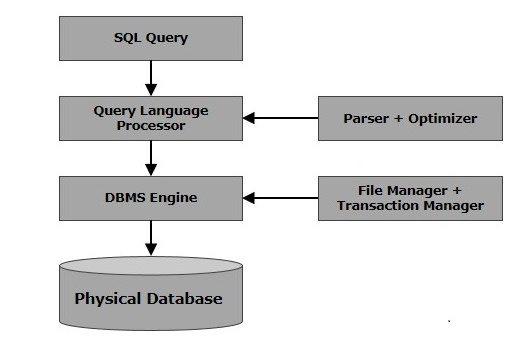



### Load SQL Extension

In [119]:
# Load ipython-sql extension
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


### Connect sql to the database
We create a database name Cricket to store records of cricket players


In [120]:
# Connect to SQLite database
%sql sqlite:///Cricket.db

































































































































































































































































### Create table Statement
Syntax: CREATE TABLE table_name

### Created a table name TEAMS TO STORE team id, team name and coach name

In [121]:
%%sql CREATE TABLE Teams (
    TeamID INT PRIMARY KEY AUTOINCREMENT,
    TeamName VARCHAR(100) NOT NULL,
    CoachName VARCHAR(100)
);

 * sqlite:///Cricket.db
(sqlite3.OperationalError) table Teams already exists
[SQL: CREATE TABLE Teams (
    TeamID INT PRIMARY KEY AUTOINCREMENT,
    TeamName VARCHAR(100) NOT NULL,
    CoachName VARCHAR(100)
);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


### Created a table name players to store player id, player name, Date of birth, role, team id

In [122]:
%%sql CREATE TABLE Players (
    PlayerID INT PRIMARY KEY AUTOINCREMENT,
    FirstName VARCHAR(50) NOT NULL,
    LastName VARCHAR(50) NOT NULL,
    DOB DATE,
    Role VARCHAR(50),   
    TeamID INT,
    FOREIGN KEY (TeamID) REFERENCES Teams(TeamID)
);

 * sqlite:///Cricket.db
(sqlite3.OperationalError) table Players already exists
[SQL: CREATE TABLE Players (
    PlayerID INT PRIMARY KEY AUTOINCREMENT,
    FirstName VARCHAR(50) NOT NULL,
    LastName VARCHAR(50) NOT NULL,
    DOB DATE,
    Role VARCHAR(50),   
    TeamID INT,
    FOREIGN KEY (TeamID) REFERENCES Teams(TeamID)
);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


### Created table matches to store the record of the matches played between two teams

In [123]:
%%sql CREATE TABLE Matches (
    MatchID INT PRIMARY KEY AUTOINCREMENT,
    MatchDate DATE NOT NULL,
    Venue VARCHAR(100),
    Team1ID INT,
    Team2ID INT,
    FOREIGN KEY (Team1ID) REFERENCES Teams(TeamID),
    FOREIGN KEY (Team2ID) REFERENCES Teams(TeamID)
);;

 * sqlite:///Cricket.db
(sqlite3.OperationalError) table Matches already exists
[SQL: CREATE TABLE Matches (
    MatchID INT PRIMARY KEY AUTOINCREMENT,
    MatchDate DATE NOT NULL,
    Venue VARCHAR(100),
    Team1ID INT,
    Team2ID INT,
    FOREIGN KEY (Team1ID) REFERENCES Teams(TeamID),
    FOREIGN KEY (Team2ID) REFERENCES Teams(TeamID)
);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


### Created table BowlingStats to store the records of the bowler in a match

In [124]:
%%sql CREATE TABLE BowlingStats (
    PlayerID INT,
    MatchID INT,
    Overs FLOAT DEFAULT 0,
    Maidens INT DEFAULT 0,
    RunsConceded INT DEFAULT 0,
    Wickets INT DEFAULT 0,
    EconomyRate FLOAT,
    PRIMARY KEY (PlayerID, MatchID),
    FOREIGN KEY (PlayerID) REFERENCES Players(PlayerID),
    FOREIGN KEY (MatchID) REFERENCES Matches(MatchID)

);;

 * sqlite:///Cricket.db
(sqlite3.OperationalError) table BowlingStats already exists
[SQL: CREATE TABLE BowlingStats (
    PlayerID INT,
    MatchID INT,
    Overs FLOAT DEFAULT 0,
    Maidens INT DEFAULT 0,
    RunsConceded INT DEFAULT 0,
    Wickets INT DEFAULT 0,
    EconomyRate FLOAT,
    PRIMARY KEY (PlayerID, MatchID),
    FOREIGN KEY (PlayerID) REFERENCES Players(PlayerID),
    FOREIGN KEY (MatchID) REFERENCES Matches(MatchID)

);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


### Created table battingstats to store the batting records of the player

In [125]:
%%sql CREATE TABLE BattingStats (
    PlayerID INT,
    MatchID INT,
    Runs INT DEFAULT 0,
    BallsFaced INT DEFAULT 0,
    Fours INT DEFAULT 0,
    Sixes INT DEFAULT 0,
    StrikeRate FLOAT,
    PRIMARY KEY (PlayerID, MatchID),
    FOREIGN KEY (PlayerID) REFERENCES Players(PlayerID),
    FOREIGN KEY (MatchID) REFERENCES Matches(MatchID)
);;

 * sqlite:///Cricket.db
(sqlite3.OperationalError) table BattingStats already exists
[SQL: CREATE TABLE BattingStats (
    PlayerID INT,
    MatchID INT,
    Runs INT DEFAULT 0,
    BallsFaced INT DEFAULT 0,
    Fours INT DEFAULT 0,
    Sixes INT DEFAULT 0,
    StrikeRate FLOAT,
    PRIMARY KEY (PlayerID, MatchID),
    FOREIGN KEY (PlayerID) REFERENCES Players(PlayerID),
    FOREIGN KEY (MatchID) REFERENCES Matches(MatchID)
);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


### Insert sample data into corresponding tables i.e. teams, players,matches, batting stats, bowling stat

In [126]:
%%sql 
-- Teams
INSERT INTO Teams (TeamID, TeamName, CoachName) VALUES 
(1, 'Red Tigers', 'John Smith'),
(2, 'Blue Sharks', 'Mary Johnson');

-- Players
INSERT INTO Players (PlayerID, FirstName, LastName, DOB, Role, TeamID) VALUES
(1, 'Swarup', 'Dahal', '2000-05-15', 'Batsman', 1),
(2, 'Rohit', 'Shrestha', '1999-03-22', 'Bowler', 1),
(3, 'Anita', 'Koirala', '2001-08-10', 'All-Rounder', 2);


-- Batting Stats
INSERT INTO BattingStats (PlayerID, MatchID, Runs, BallsFaced, Fours, Sixes, StrikeRate) VALUES
(1, 1, 50, 40, 6, 2, 125.0),
(3, 1, 35, 30, 4, 1, 116.7);

-- Bowling Stats
INSERT INTO BowlingStats (PlayerID, MatchID, Overs, Maidens, RunsConceded, Wickets, EconomyRate) VALUES
(2, 1, 10, 1, 45, 3, 4.5),
(3, 1, 4, 0, 28, 1, 7.0);


 * sqlite:///Cricket.db
(sqlite3.IntegrityError) UNIQUE constraint failed: Teams.TeamID
[SQL: -- Teams
INSERT INTO Teams (TeamID, TeamName, CoachName) VALUES 
(1, 'Red Tigers', 'John Smith'),
(2, 'Blue Sharks', 'Mary Johnson');]
(Background on this error at: https://sqlalche.me/e/20/gkpj)


### Show table 

In [127]:
%%sql
INSERT INTO Matches 
(MatchID, MatchDate, Venue, Team1ID, Team2ID, Team1Score, Team2Score, WinnerTeamID, WinBy) VALUES
(1, '2025-12-05', 'Stadium A', 1, 2, 250, 245, 1, '5 runs'),
(2, '2025-12-10', 'Stadium B', 1, 2, 260, 265, 2, '5 runs'),
(3, '2025-01-15', 'Melbourne Cricket Ground', 3, 4, 280, 270, 3, '10 runs'),  
(4, '2025-02-10', 'Lord''s Cricket Ground', 5, 6, 300, 295, 5, '5 runs'),    
(5, '2025-03-15', 'Gaddafi Stadium', 7, 8, 250, 245, 7, '5 runs'),
(6, '2025-04-10', 'Kensington Oval', 9, 10, 280, 300, 10, '20 runs'),
(7, '2025-05-05', 'R. Premadasa Stadium', 8, 7, 260, 261, 7, '1 wicket'),
(8, '2025-06-20', 'Sher-e-Bangla Stadium', 10, 9, 275, 270, 10, '5 runs'),
(9, '2025-07-05', 'Kabul International Cricket Stadium', 11, 12, 305, 289, 11, '16 runs'),
(10, '2025-07-10', 'The Village', 12, 13, 220, 218, 12, '2 runs'),
(11, '2025-07-15', 'Harare Sports Club', 13, 11, 240, 250, 11, '10 runs'),
(12, '2025-08-01', 'Kabul International Cricket Stadium', 11, 13, 300, 298, 11, '2 runs'),
(13, '2025-08-05', 'The Village', 12, 11, 270, 275, 11, '5 runs'),
(14, '2025-08-10', 'Harare Sports Club', 13, 12, 265, 260, 13, '5 runs');


 * sqlite:///Cricket.db
(sqlite3.IntegrityError) UNIQUE constraint failed: Matches.MatchID
[SQL: INSERT INTO Matches 
(MatchID, MatchDate, Venue, Team1ID, Team2ID, Team1Score, Team2Score, WinnerTeamID, WinBy) VALUES
(1, '2025-12-05', 'Stadium A', 1, 2, 250, 245, 1, '5 runs'),
(2, '2025-12-10', 'Stadium B', 1, 2, 260, 265, 2, '5 runs'),
(3, '2025-01-15', 'Melbourne Cricket Ground', 3, 4, 280, 270, 3, '10 runs'),  
(4, '2025-02-10', 'Lord''s Cricket Ground', 5, 6, 300, 295, 5, '5 runs'),    
(5, '2025-03-15', 'Gaddafi Stadium', 7, 8, 250, 245, 7, '5 runs'),
(6, '2025-04-10', 'Kensington Oval', 9, 10, 280, 300, 10, '20 runs'),
(7, '2025-05-05', 'R. Premadasa Stadium', 8, 7, 260, 261, 7, '1 wicket'),
(8, '2025-06-20', 'Sher-e-Bangla Stadium', 10, 9, 275, 270, 10, '5 runs'),
(9, '2025-07-05', 'Kabul International Cricket Stadium', 11, 12, 305, 289, 11, '16 runs'),
(10, '2025-07-10', 'The Village', 12, 13, 220, 218, 12, '2 runs'),
(11, '2025-07-15', 'Harare Sports Club', 13, 11, 240, 250, 11

In [128]:
%%sql
SELECT name FROM sqlite_master WHERE type='table';

 * sqlite:///Cricket.db
Done.


name
Teams
Players
Matches
BattingStats
BowlingStats


### add more data 

In [129]:
%%sql
INSERT INTO Teams (TeamID, TeamName, CoachName) VALUES 
(3, 'India', 'Rahul Dravid'),
(4, 'Australia', 'Andrew McDonald'),
(5, 'England', 'Brendon McCullum'),
(6, 'New Zealand', 'Gary Stead');;
INSERT INTO Players (PlayerID, FirstName, LastName, DOB, Role, TeamID) VALUES
(4, 'Virat', 'Kohli', '1988-11-05', 'Batsman', 3),
(5, 'Rohit', 'Sharma', '1987-04-30', 'Batsman', 3),
(6, 'Jasprit', 'Bumrah', '1993-12-06', 'Bowler', 3),
(7, 'David', 'Warner', '1986-10-27', 'Batsman', 4),
(8, 'Pat', 'Cummins', '1993-05-08', 'Bowler', 4),
(9, 'Joe', 'Root', '1990-12-30', 'Batsman', 5),
(10, 'Jofra', 'Archer', '1995-04-01', 'Bowler', 5),
(11, 'Kane', 'Williamson', '1990-08-08', 'Batsman', 6),
(12, 'Trent', 'Boult', '1989-07-22', 'Bowler', 6);;

INSERT INTO BattingStats (PlayerID, MatchID, Runs, BallsFaced, Fours, Sixes, StrikeRate) VALUES
(4, 3, 85, 72, 10, 1, 118.0),   -- Virat Kohli
(7, 3, 60, 45, 7, 3, 133.3),    -- David Warner
(9, 4, 110, 95, 12, 2, 115.7),  -- Joe Root
(11, 4, 92, 88, 8, 1, 104.5);   -- Kane Williamson
INSERT INTO BowlingStats (PlayerID, MatchID, Overs, Maidens, RunsConceded, Wickets, EconomyRate) VALUES
(6, 3, 10, 2, 48, 2, 4.8),   -- Jasprit Bumrah
(8, 3, 10, 1, 52, 3, 5.2),   -- Pat Cummins
(10, 4, 9, 0, 58, 2, 6.4),   -- Jofra Archer
(12, 4, 10, 1, 45, 4, 4.5);  -- Trent Boult


 * sqlite:///Cricket.db
(sqlite3.IntegrityError) UNIQUE constraint failed: Teams.TeamID
[SQL: INSERT INTO Teams (TeamID, TeamName, CoachName) VALUES 
(3, 'India', 'Rahul Dravid'),
(4, 'Australia', 'Andrew McDonald'),
(5, 'England', 'Brendon McCullum'),
(6, 'New Zealand', 'Gary Stead');]
(Background on this error at: https://sqlalche.me/e/20/gkpj)


In [ ]:
%%sql
-- Teams
INSERT INTO Teams (TeamID, TeamName, CoachName) VALUES 
(7, 'Pakistan', 'Saeed Anwar'),
(8, 'Sri Lanka', 'Chris Silverwood'),
(9, 'West Indies', 'Phil Simmons'),
(10, 'Bangladesh', 'Russell Domingo'),
(11, 'Afghanistan', 'Jonathan Trott'),
(12, 'Ireland', 'Graham Ford'),
(13, 'Zimbabwe', 'Dave Houghton');

-- Players
INSERT INTO Players (PlayerID, FirstName, LastName, DOB, Role, TeamID) VALUES
(13, 'Babar', 'Azam', '1994-10-15', 'Batsman', 7),
(14, 'Shaheen', 'Afridi', '2000-04-06', 'Bowler', 7),
(15, 'Dimuth', 'Karunaratne', '1988-08-21', 'Batsman', 8),
(16, 'Wanindu', 'Hasaranga', '1997-07-29', 'All-Rounder', 8),
(17, 'Kemar', 'Roach', '1988-07-30', 'Bowler', 9),
(18, 'Shai', 'Hope', '1993-07-27', 'Batsman', 9),
(19, 'Shakib', 'Al Hasan', '1987-03-24', 'All-Rounder', 10),
(20, 'Mushfiqur', 'Rahim', '1987-09-09', 'Wicket-Keeper', 10),
(21, 'Rashid', 'Khan', '1998-09-20', 'Bowler', 11),
(22, 'Mohammad', 'Nabi', '1985-09-19', 'All-Rounder', 11),
(23, 'Paul', 'Stirling', '1990-09-03', 'Batsman', 12),
(24, 'Kevin', 'O''Brien', '1984-03-04', 'Batsman', 12),
(25, 'Sean', 'Williams', '1986-09-26', 'All-Rounder', 13),
(26, 'Craig', 'Ervine', '1985-02-23', 'Batsman', 13),
(27, 'Mohammad', 'Shan', '1995-05-10', 'Batsman', 11),
(28, 'Andy', 'Balbirnie', '1991-10-16', 'Batsman', 12),
(29, 'Regis', 'Chakabva', '1987-09-20', 'Wicket-Keeper', 13),
(30, 'Mujeeb', 'Ur Rahman', '2001-03-28', 'Bowler', 11),
(31, 'Fawad', 'Ahmad', '1992-03-17', 'Bowler', 11),
(32, 'George', 'Dockrell', '1992-07-16', 'Bowler', 12),
(33, 'Tim', 'Chand', '1988-11-01', 'Batsman', 13),
(34, 'Hashmat', 'ullah', '1994-03-10', 'Batsman', 11),
(35, 'Curtis', 'Campher', '1999-10-31', 'All-Rounder', 12),
(36, 'Brendan', 'Taylor', '1986-02-06', 'Batsman', 13),
(37, 'Nawroz', 'Mardan', '2000-01-12', 'All-Rounder', 11),
(38, 'Stuart', 'Patterson', '1991-06-20', 'Bowler', 12),
(39, 'Brian', 'Chari', '1992-05-15', 'All-Rounder', 13),
(40, 'Sharafuddin', 'Ashraf', '1995-08-30', 'Batsman', 11);


-- Batting Stats
INSERT INTO BattingStats (PlayerID, MatchID, Runs, BallsFaced, Fours, Sixes, StrikeRate) VALUES
(13, 5, 78, 65, 8, 1, 120.0),
(15, 5, 45, 38, 4, 1, 118.4),
(18, 6, 90, 72, 10, 2, 125.0),
(19, 6, 56, 50, 5, 1, 112.0),
(16, 7, 65, 52, 6, 1, 125.0),
(14, 7, 22, 18, 2, 0, 122.2),
(20, 8, 71, 60, 7, 1, 118.3),
(17, 8, 48, 40, 4, 0, 120.0),
(21, 9, 55, 38, 6, 1, 144.7),
(22, 9, 32, 28, 4, 0, 114.3),
(23, 9, 70, 60, 8, 2, 116.7),
(24, 10, 48, 40, 5, 0, 120.0),
(25, 10, 35, 30, 4, 1, 116.7),
(26, 10, 62, 50, 7, 1, 124.0),
(27, 11, 41, 32, 4, 0, 128.1),
(28, 11, 55, 45, 6, 1, 122.2),
(29, 11, 30, 28, 3, 0, 107.1),
(30, 12, 65, 50, 7, 2, 130.0),
(31, 12, 27, 25, 3, 0, 108.0),
(32, 12, 40, 38, 4, 0, 105.3),
(33, 13, 52, 42, 5, 1, 123.8),
(34, 13, 48, 40, 5, 1, 120.0),
(35, 13, 33, 28, 3, 0, 117.9),
(36, 14, 60, 50, 6, 1, 120.0),
(37, 14, 39, 32, 4, 0, 121.9),
(38, 14, 45, 40, 4, 1, 112.5),
(39, 14, 50, 45, 5, 1, 111.1),
(40, 14, 55, 48, 6, 2, 114.6);

-- Bowling Stats
INSERT INTO BowlingStats (PlayerID, MatchID, Overs, Maidens, RunsConceded, Wickets, EconomyRate) VALUES
(14, 5, 10, 1, 50, 3, 5.0),
(16, 5, 8, 0, 42, 2, 5.25),
(17, 6, 10, 1, 55, 4, 5.5),
(19, 6, 9, 0, 48, 2, 5.33),
(16, 7, 10, 0, 60, 3, 6.0),
(14, 7, 9, 0, 45, 2, 5.0),
(20, 8, 10, 1, 50, 3, 5.0),
(17, 8, 8, 0, 40, 2, 5.0),
(21, 9, 10, 1, 50, 3, 5.0),
(30, 9, 8, 0, 42, 2, 5.25),
(31, 9, 9, 0, 48, 2, 5.33),
(22, 10, 10, 2, 45, 3, 4.5),
(32, 10, 8, 0, 40, 1, 5.0),
(38, 10, 9, 0, 46, 2, 5.11),
(37, 11, 10, 1, 50, 3, 5.0),
(39, 11, 8, 0, 42, 2, 5.25),
(40, 12, 9, 0, 48, 2, 5.33),
(34, 12, 10, 1, 50, 3, 5.0),
(27, 13, 8, 0, 45, 1, 5.62),
(35, 13, 9, 1, 48, 2, 5.33),
(36, 14, 10, 2, 52, 4, 5.2),
(31, 14, 8, 0, 40, 2, 5.0),
(22, 14, 9, 1, 47, 3, 5.22);


 * sqlite:///Cricket.db


(sqlite3.IntegrityError) UNIQUE constraint failed: Teams.TeamID
[SQL: -- Teams
INSERT INTO Teams (TeamID, TeamName, CoachName) VALUES 
(7, 'Pakistan', 'Saeed Anwar'),
(8, 'Sri Lanka', 'Chris Silverwood'),
(9, 'West Indies', 'Phil Simmons'),
(10, 'Bangladesh', 'Russell Domingo'),
(11, 'Afghanistan', 'Jonathan Trott'),
(12, 'Ireland', 'Graham Ford'),
(13, 'Zimbabwe', 'Dave Houghton');]
(Background on this error at: https://sqlalche.me/e/20/gkpj)


In [131]:
%%sql
DELETE FROM Matches;


 * sqlite:///Cricket.db
14 rows affected.


[]

### displaying all data from teams

In [132]:
%%sql 
select * from Teams;


 * sqlite:///Cricket.db
Done.


TeamID,TeamName,CoachName
1,Red Tigers,John Smith
2,Blue Sharks,Mary Johnson
3,India,Rahul Dravid
4,Australia,Andrew McDonald
5,England,Brendon McCullum
6,New Zealand,Gary Stead
7,Pakistan,Saeed Anwar
8,Sri Lanka,Chris Silverwood
9,West Indies,Phil Simmons
10,Bangladesh,Russell Domingo


### displaying all data from players

In [133]:
%%sql 
select * from Players;

 * sqlite:///Cricket.db
Done.


PlayerID,FirstName,LastName,DOB,Role,TeamID
2,Rohit,Shrestha,1999-03-22,Bowler,1
3,Anita,Koirala,2001-08-10,All-Rounder,2
4,Virat,Kohli,1988-11-05,Batsman,3
5,Rohit,Sharma,1987-04-30,Batsman,3
6,Jasprit,Bumrah,1993-12-06,Bowler,3
7,David,Warner,1986-10-27,Batsman,4
8,Pat,Cummins,1993-05-08,Bowler,4
9,Joe,Root,1990-12-30,Batsman,5
10,Jofra,Archer,1995-04-01,Bowler,5
11,Kane,Williamson,1990-08-08,Batsman,6


### displaying all data from Matches

In [134]:
%%sql
select * from Matches;

 * sqlite:///Cricket.db
Done.


MatchID,MatchDate,Venue,Team1ID,Team2ID,Team1Score,Team2Score,WinnerTeamID,WinBy


### displaying all data from batting stats

In [135]:
%%sql
select * from BattingStats;

 * sqlite:///Cricket.db
Done.


PlayerID,MatchID,Runs,BallsFaced,Fours,Sixes,StrikeRate
1,1,50,40,6,2,125.0
3,1,35,30,4,1,116.7
4,3,85,72,10,1,118.0
7,3,60,45,7,3,133.3
9,4,110,95,12,2,115.7
11,4,92,88,8,1,104.5
13,5,78,65,8,1,120.0
15,5,45,38,4,1,118.4
18,6,90,72,10,2,125.0
19,6,56,50,5,1,112.0


### displaying all data from bowling stats

In [136]:
%%sql
select * from BowlingStats;

 * sqlite:///Cricket.db
Done.


PlayerID,MatchID,Overs,Maidens,RunsConceded,Wickets,EconomyRate
2,1,10.0,1,45,3,4.5
3,1,4.0,0,28,1,7.0
6,3,10.0,2,48,2,4.8
8,3,10.0,1,52,3,5.2
10,4,9.0,0,58,2,6.4
12,4,10.0,1,45,4,4.5
14,5,10.0,1,50,3,5.0
16,5,8.0,0,42,2,5.25
17,6,10.0,1,55,4,5.5
19,6,9.0,0,48,2,5.33


### Query to display player with highest run across all matches

In [137]:
%%sql
SELECT p.PlayerID, p.FirstName, p.LastName, t.TeamName, SUM(b.Runs) AS TotalRuns
FROM BattingStats b
JOIN Players p ON b.PlayerID = p.PlayerID
LEFT JOIN Teams t ON p.TeamID = t.TeamID
GROUP BY p.PlayerID
ORDER BY TotalRuns DESC
LIMIT 1;

 * sqlite:///Cricket.db
Done.


PlayerID,FirstName,LastName,TeamName,TotalRuns
9,Joe,Root,England,110


### Display the player name and number of wickets for highest wicket taker

In [138]:
%%sql
SELECT max(b.wickets) as MostWickets, p.firstname, p.lastname from BowlingStats b
JOIN Players p on b.playerid = p.playerid


 * sqlite:///Cricket.db
Done.


MostWickets,FirstName,LastName
4,Trent,Boult


### Select operation to select first name, lastname, team name from players where player team name is red tigers

In [139]:
%%sql 
SELECT FirstName, LastName, Role, TeamName
FROM Players
JOIN Teams ON Players.TeamID = Teams.TeamID
WHERE TeamName = 'Red Tigers';


 * sqlite:///Cricket.db
Done.


FirstName,LastName,Role,TeamName
Rohit,Shrestha,Bowler,Red Tigers


### display the batting records of players for a match 1

In [140]:
%%sql 
SELECT p.FirstName, p.LastName, b.Runs, b.BallsFaced, b.Fours, b.Sixes, b.StrikeRate
FROM BattingStats b
JOIN Players p ON b.PlayerID = p.PlayerID
WHERE b.MatchID = 1;


 * sqlite:///Cricket.db
Done.


FirstName,LastName,Runs,BallsFaced,Fours,Sixes,StrikeRate
Anita,Koirala,35,30,4,1,116.7


### display the record of bowler for a match 1


In [141]:
%%sql
SELECT p.FirstName, p.LastName, bw.Overs, bw.RunsConceded, bw.Wickets, bw.EconomyRate
FROM BowlingStats bw
JOIN Players p ON bw.PlayerID = p.PlayerID
WHERE bw.MatchID = 1;


 * sqlite:///Cricket.db
Done.


FirstName,LastName,Overs,RunsConceded,Wickets,EconomyRate
Rohit,Shrestha,10.0,45,3,4.5
Anita,Koirala,4.0,28,1,7.0


### Display the records of teams winning in the third match

In [142]:
%%sql ALTER TABLE Matches
ADD COLUMN Team1Score INT;


 * sqlite:///Cricket.db
(sqlite3.OperationalError) duplicate column name: Team1Score
[SQL: ALTER TABLE Matches
ADD COLUMN Team1Score INT;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [143]:
%%sql
ALTER TABLE Matches
ADD COLUMN Team2Score INT;


 * sqlite:///Cricket.db
(sqlite3.OperationalError) duplicate column name: Team2Score
[SQL: ALTER TABLE Matches
ADD COLUMN Team2Score INT;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [144]:
%%sql
ALTER TABLE Matches
ADD COLUMN WinnerTeamID INT REFERENCES Teams(TeamID);

 * sqlite:///Cricket.db
(sqlite3.OperationalError) duplicate column name: WinnerTeamID
[SQL: ALTER TABLE Matches
ADD COLUMN WinnerTeamID INT REFERENCES Teams(TeamID);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [145]:
%%sql
ALTER TABLE Matches
ADD COLUMN WinBy VARCHAR(50);


 * sqlite:///Cricket.db
(sqlite3.OperationalError) duplicate column name: WinBy
[SQL: ALTER TABLE Matches
ADD COLUMN WinBy VARCHAR(50);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)
